# Машинне навчання

## Метод головних компонент (PCA) 

###  Лабораторна робота 4


**_Студентка Пороскун Олена. Група ПМ.м-21_**

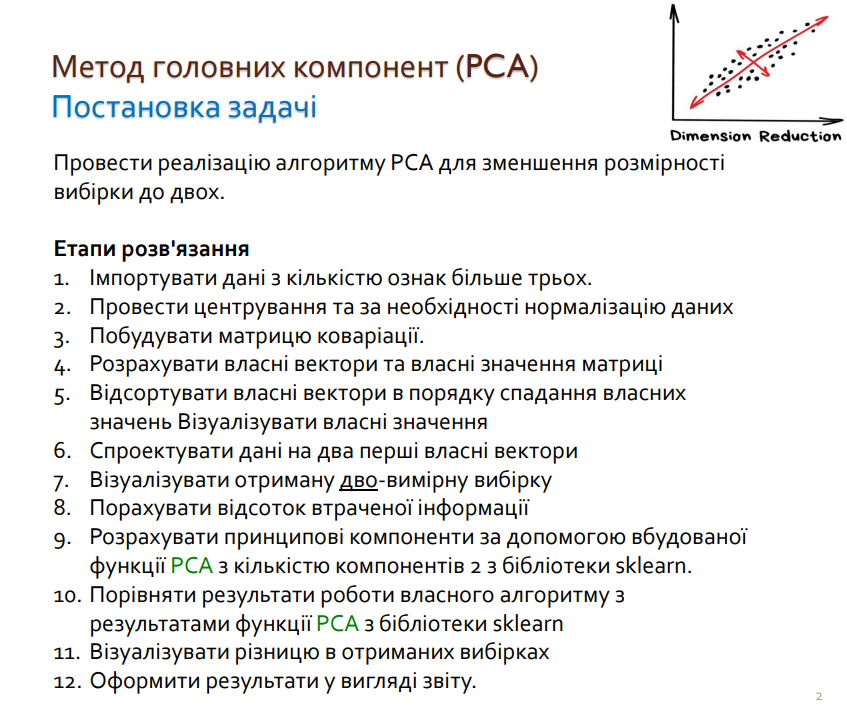

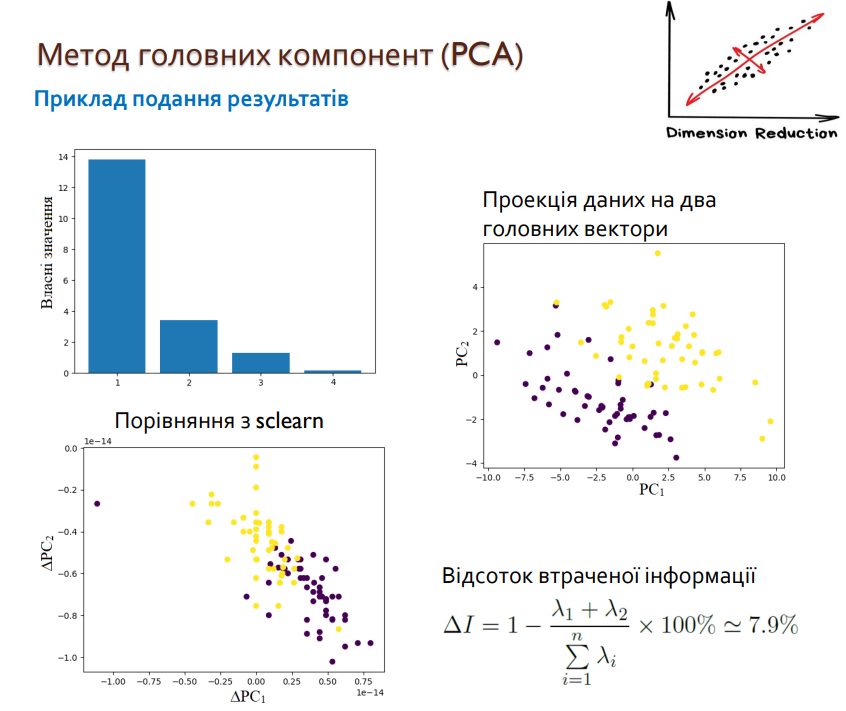

__________________________________________________________________________________________________________________________

* **Імпортуємо потрібні бібліотеки:**  

In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#from sklearn import metrics

**1. Імпортувати дані з кількістю ознак більше трьох.**

In [4]:
iris = load_iris()
features = iris.data
target = iris.target

In [5]:
print(np.shape(features))
print(np.shape(target))

(150, 4)
(150,)


In [6]:
dfIris = pd.DataFrame(data = np.c_[features, target], columns = iris['feature_names'] + ['target'])
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
print(dfIris['target'].unique())

[0. 1. 2.]


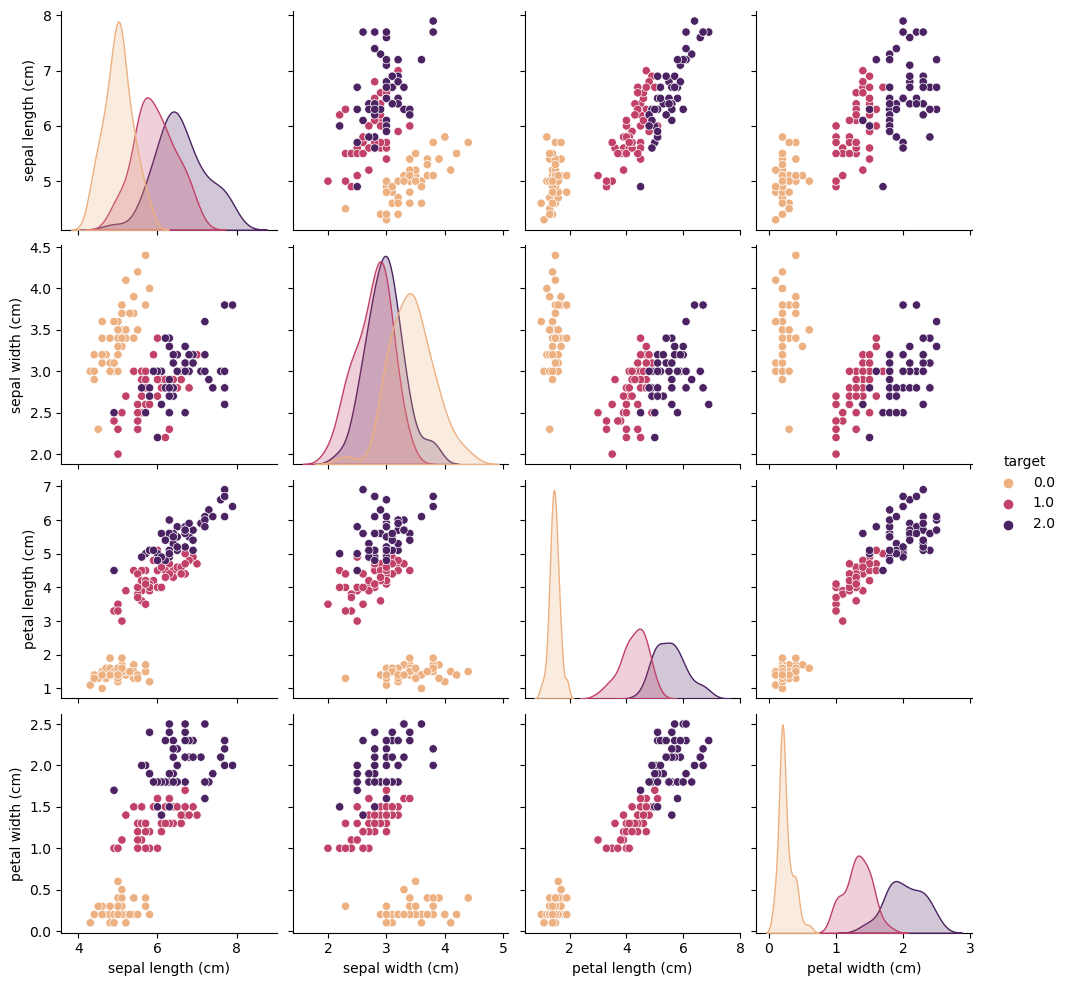

In [8]:
sns.pairplot(dfIris, hue ='target', palette = "flare") 
plt.show()

*Оскiльки перший клас добре видiляється вiд iнших двох залишимо у вибiрцi лише данi для **другого та третього класiв**. Отримуємо вибiрку X = [ℓ×n], де ℓ – кiлькiсть об’єктiв, n – кiлькiсть ознак (для даного прикладу n = 4).*

In [9]:
dfIris2 = dfIris.query("`target` != 0")
dfIris2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
dfIris2['target'].unique()

array([1., 2.])

In [11]:
X = np.array((dfIris2.drop(columns='target')).values)
X[:5]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [12]:
#y = np.array((dfIris2.drop(columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])).values)
#y

**2. Провести центрування та за необхідності нормалізацію даних.**

In [13]:
from sklearn.preprocessing import StandardScaler
# масштабування даних
x_scaled = StandardScaler().fit_transform(X)

In [14]:
X[0]

array([7. , 3.2, 4.7, 1.4])

In [15]:
x_scaled[0]

array([ 1.11900931,  0.99068792, -0.25077906, -0.65303909])

In [16]:
x_matrix = np.array([x_scaled[:, 0], x_scaled[:, 1], x_scaled[:, 2], x_scaled[:, 3]])

**3. Побудувати матрицю коваріації.**

In [17]:
covmat = np.cov(x_matrix)
covmat

array([[1.01010101, 0.55944934, 0.83684713, 0.59970648],
       [0.55944934, 1.01010101, 0.52505282, 0.57192176],
       [0.83684713, 0.52505282, 1.01010101, 0.83166424],
       [0.59970648, 0.57192176, 0.83166424, 1.01010101]])

In [18]:
np.shape(covmat)

(4, 4)

**4. Розрахувати власні вектори та власні значення матриці.**

In [19]:
w, v = np.linalg.eig(covmat)
print('Власні значення (вектор):\n', w) 

Власні значення (вектор):
 [2.98778909 0.08206412 0.40983199 0.56071884]


In [20]:
print('Власні вектори(масив):\n', v)

Власні вектори(масив):
 [[-0.5071303  -0.4623842  -0.69307315  0.22061124]
 [-0.43474966  0.13624797 -0.05558682 -0.88844771]
 [-0.54369524  0.74828559  0.01943532  0.37958719]
 [-0.5081408  -0.45574777  0.71845806  0.13380926]]


Відповідність власних значень та векторів:
* w[0] відповідає 0-му стовпчику v (v[:,0]),

* w[1] відповідає 1-му стовпчику v (v[:,1]), 

* w[i] відповідає i-му стовпчику v (v[:,i]).

In [21]:
w[0]

2.9877890906474667

In [22]:
v[:,0]

array([-0.5071303 , -0.43474966, -0.54369524, -0.5081408 ])

Перевірка $ Au = w_1 u:$

In [23]:
u = v[:, 1]
print('u ', u)

w1 = w[1]
print('w1 ', w1, '\n')

print('𝐴𝑢 \t', np.dot(covmat, u))
print('𝑤1 𝑢 \t', w1*u)

u  [-0.4623842   0.13624797  0.74828559 -0.45574777]
w1  0.08206411695786031 

𝐴𝑢 	 [-0.03794515  0.01118107  0.0614074  -0.03740054]
𝑤1 𝑢 	 [-0.03794515  0.01118107  0.0614074  -0.03740054]


**5. Відсортувати власні вектори в порядку спадання власних значень. Візуалізувати власні значення.**

In [24]:
data = [('1', w[0]),
        ('2', w[1]),
        ('3', w[2]),
        ('4', w[3])]
df = pd.DataFrame(data, columns =['№ ознаки', 'Власне значення'])
df

,№ ознаки,Власне значення
0,1,2.987789
1,2,0.082064
2,3,0.409832
3,4,0.560719


Text(0.5, 1.0, 'Власні значення')

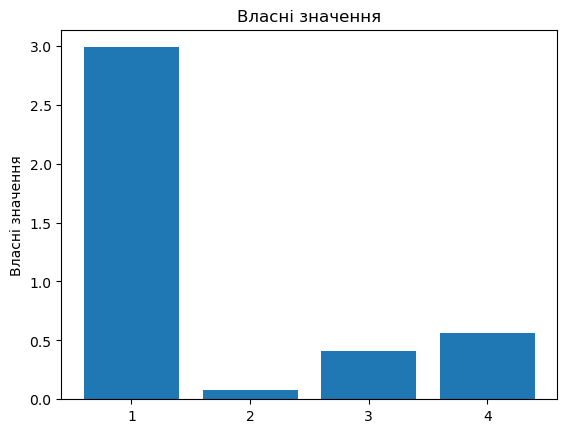

In [25]:
plt.bar(df['№ ознаки'], df['Власне значення'])
plt.ylabel('Власні значення')
plt.title('Власні значення')

,№ ознаки,Власне значення
0,1,2.987789
3,4,0.560719
2,3,0.409832
1,2,0.082064


Text(0.5, 1.0, 'Власні значення (відсортовані за спаданням)')

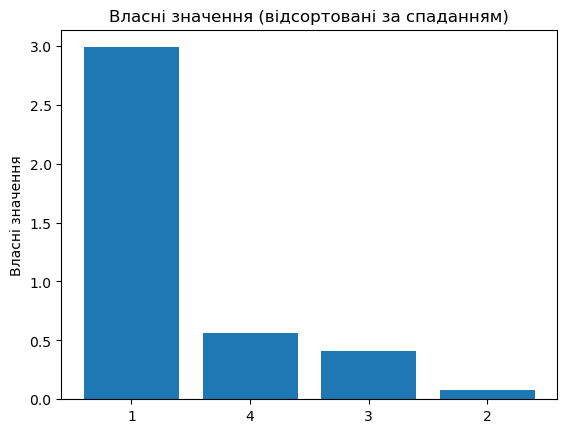

In [26]:
df_sort = df.sort_values(by=['Власне значення'], ascending=False)
display(df_sort)
plt.bar(df_sort['№ ознаки'], df_sort['Власне значення'])
plt.ylabel('Власні значення')
plt.title('Власні значення (відсортовані за спаданням)')

**6. Спроектувати дані на два перші власні вектори. Встановимо кiлькiсть головних компонент $nPC = 2$. Проектуємо данi на першi два власнi вектори матрицi коварiацiї, що характеризуються найбiльшими власними значеннями.**

Множимо вихiдну матрицюданих розмiру $[ℓ × n]$ на транспоновану матрицю двох власних векторiв розмiру $[n × nPC]$ для отримання нової матрицi даних розмiром $[ℓ × nPC]$. Вiзуалiзуємо отриманi данi.

In [27]:
np.shape(x_scaled) # [ℓ × 𝑛]

(100, 4)

In [28]:
index1, index2 = (df_sort['№ ознаки'].head(2)).values
index1, index2 = int(index1), int(index2)
print(index1, index2)

1 4


In [29]:
eigenvectors = np.array([v[index1-1], v[index2-1]])
vT = eigenvectors.transpose()
print(np.shape(vT)) # [𝑛 × 𝑛𝑃𝐶]
print(vT)

(4, 2)
[[-0.5071303  -0.5081408 ]
 [-0.4623842  -0.45574777]
 [-0.69307315  0.71845806]
 [ 0.22061124  0.13380926]]


In [30]:
x_new = np.dot(x_scaled, vT)
np.shape(x_new) # [ℓ × 𝑛𝑃𝐶]

(100, 2)

**7. Візуалізувати отриману дво-вимірну вибірку.**

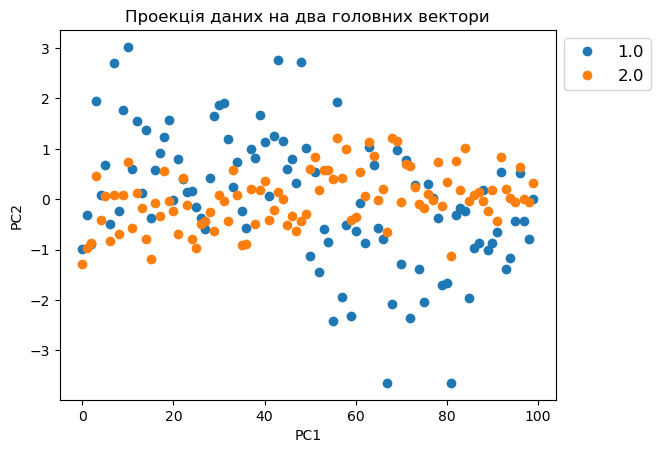

In [31]:
lab = dfIris2['target'].unique()
plt.plot(x_new, 'o', markersize = 5,
         #markerfacecolor='white',
         #markeredgecolor='gray',
         markeredgewidth = 2, label=lab)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Проекція даних на два головних вектори')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

**8. Порахувати відсоток втраченої інформації, використовуючи власнi значення матрицi коварiацiй при зменшеннi розмiрностi з чотирьох ознак до двох:**

In [32]:
df_sort

,№ ознаки,Власне значення
0,1,2.987789
3,4,0.560719
2,3,0.409832
1,2,0.082064


In [33]:
l1 = df_sort['Власне значення'].values[0]
l2 = df_sort['Власне значення'].values[1]
print('l1 {:.6f}\nl2 {:.6f}'.format(l1, l2))

l_sum = np.sum(df_sort['Власне значення'])

delt_I = 1 - ((l1+l2)/l_sum)
delt_I *= 100
print('Відсоток втраченої інформації:\n{:.3} %'.format(delt_I))

l1 2.987789
l2 0.560719
Відсоток втраченої інформації:
12.2 %


**9. Розрахувати принципові компоненти за допомогою вбудованої функції PCA з кількістю компонентів 2 з бібліотеки sklearn.**

In [34]:
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(np.transpose(x_matrix))

**10. Порівняти результати роботи власного алгоритму з результатами функції PCA з бібліотеки sklearn.**

In [35]:
print ('Sklearn reduced X [:5]: \n', XPCAreduced[:5])

Sklearn reduced X [:5]: 
 [[ 0.53000157 -0.81588358]
 [ 0.05648712 -1.0773472 ]
 [ 0.5744019  -0.4569081 ]
 [-2.38876911  0.74233881]
 [-0.32567545  0.07569688]]


In [36]:
x_new[:5]

array([[-0.99582149, -1.28767501],
       [-0.31350845, -0.96865302],
       [-0.89581604, -0.86638657],
       [ 1.95293489,  0.46302455],
       [ 0.08385608, -0.40762341]])

In [37]:
print('x_scaled \t', np.shape(x_scaled))       # [ℓ × 𝑛]
print('x_new    \t', np.shape(x_new))          # [ℓ × 𝑛𝑃𝐶]
print('XPCAreduced \t', np.shape(XPCAreduced)) # [ℓ × 𝑛𝑃𝐶]

x_scaled 	 (100, 4)
x_new    	 (100, 2)
XPCAreduced 	 (100, 2)


**11. Візуалізувати різницю в отриманих вибірках.**

In [38]:
difference = (XPCAreduced-x_new)

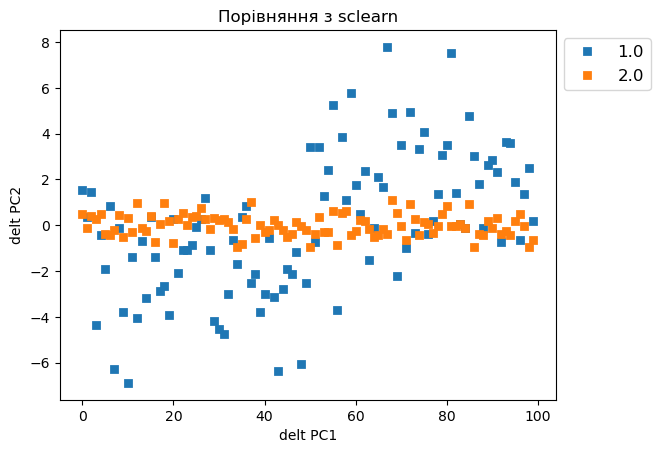

In [39]:
lab = dfIris2['target'].unique()
plt.plot(difference, 's', markersize = 5,
         #markerfacecolor='white',
         #markeredgecolor='gray',
         markeredgewidth = 2, label=lab)

plt.xlabel('delt PC1')
plt.ylabel('delt PC2')
plt.title('Порівняння з sclearn')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

__________________________________________________________________________________________________________________________